#3 Assignment Description


3.1 Data Preprocessing (5 points)
With the 20 Newsgroups dataset at hand, the initial step involves preparing the textual data for subsequent clustering. This preparation is multi-faceted and encompasses:
1. Filter the dataset to only include articles related to science. You can do this by selecting categories such as ’sci.med’, ’sci.space’, ’sci.electronics’, and ’sci.crypt’.
2. Tokenization: Use ‘nltk.word tokenize‘ to break down the text into individual tokens.
3. Stop words removal: Utilize ‘nltk.corpus.stopwords‘ to remove common stop words from the text.
4. Lemmatization and stemming: Apply ‘nltk.WordNetLemmatizer‘ to convert words to their base forms.
5. Vectorization: Use ‘sklearn.feature extraction.text.TfidfVectorizer‘ to transform the text data into a matrix of TF-IDF features.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

categories = ['sci.med', 'sci.space', 'sci.electronics', 'sci.crypt']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)
data = newsgroups.data
target = newsgroups.target
target_names = newsgroups.target_names

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

data_cleaned = [preprocess_text(doc) for doc in data]

vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(data_cleaned)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3.2 Clustering Implementation (15 points)
Upon preprocessing the text, the next phase is to perform clustering. Given that the filtered data contains fewer categories, it’s reasonable to expect a corresponding number of clusters during the clustering process. You’re tasked with implementing
the following clustering algorithm:
1. K-means Clustering (3 points): Use ‘sklearn.cluster.KMeans‘ to segregate the newsgroup posts into distinct clusters. Report the number of posts in each cluster using ‘numpy.unique‘.
2. Cluster Visualization (4 points): Apply ‘sklearn.decomposition.TruncatedSVD‘ to reduce the dimensionality to 2 components and use ‘matplotlib.pyplot‘ to plot the clusters.
3. Optimal Number of Clusters (4 points): Utilize the Silhouette Analysis method to identify the ideal number of clusters k. Evaluate potential cluster counts ranging from 2 to 10 by initializing the ‘KMeans‘ module with each k. Use ‘matplotlib.pyplot‘ to plot the silhouette scores and identify the optimal k value. Use the function ‘silhouette score‘ from ‘sklearn.metrics‘ to compute the silhouette score for each k. After plotting, explain the result:
(a) Is the identified optimal k aligned with the ground truth category information?
(b) If not, discuss potential reasons why the clustering might not perfectly align with the ground truth.
4. Evaluation (4 points): Evaluate the clustering performance by comparing the cluster labels to the original target names (which serve as the golden standard). Report the number of examples in each true category and each cluster. Use metrics such as Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) from ‘sklearn.metrics‘ to compare the clustering labels with the true labels. Explain the results and interpret the scores.



Number of posts in each cluster:
{0: 2389, 1: 76, 2: 650, 3: 837}


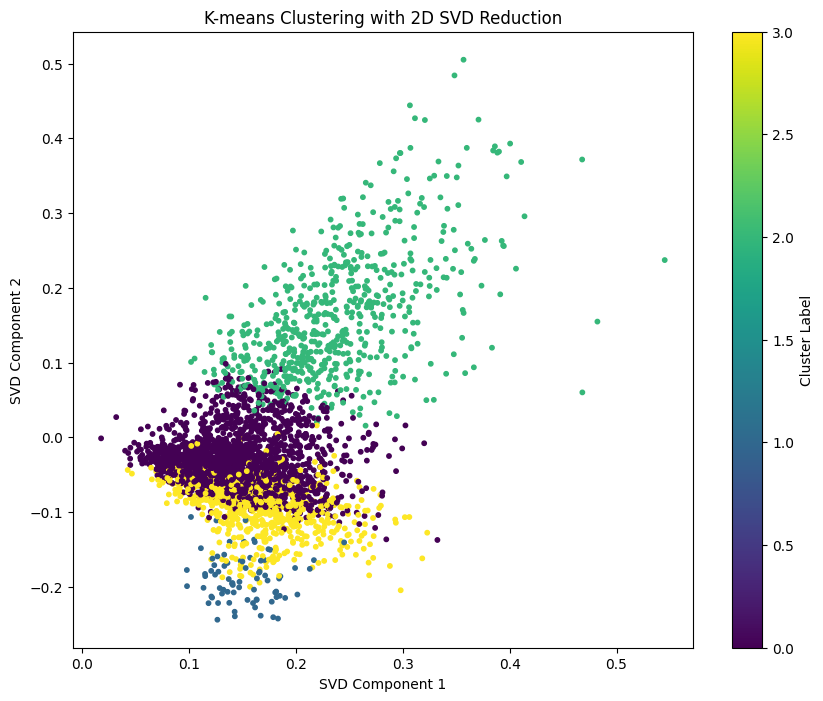

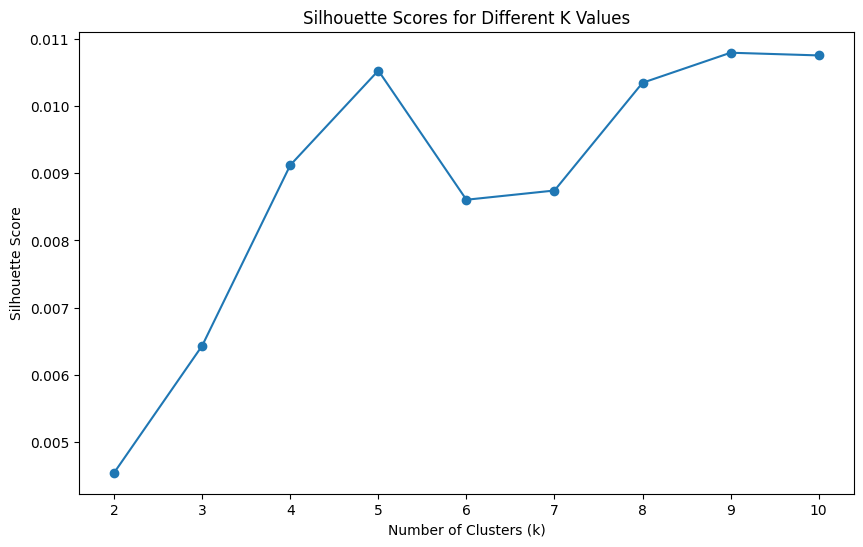

The optimal number of clusters based on silhouette analysis: 9
Adjusted Rand Index (ARI): 0.3163493166495943
Normalized Mutual Information (NMI): 0.4754498316877602
Number of examples in each true category:
{'sci.crypt': 991, 'sci.electronics': 984, 'sci.med': 990, 'sci.space': 987}
Number of examples in each cluster:
{0: 2389, 1: 76, 2: 650, 3: 837}


In [4]:
# 1. K-means Clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
labels = kmeans.labels_

print("Number of posts in each cluster:")
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

# 2. Cluster Visualization
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(x)

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=10)
plt.title("K-means Clustering with 2D SVD Reduction")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

# 3. Optimal Number of Clusters
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters based on silhouette analysis: {optimal_k}")

# Is the identified optimal k aligned with the ground truth category information?
# it is not
# Discuss potential reasons why the clustering might not perfectly align with the ground truth.
# It could be due to vocabulary overlap and limitations of the k-means algorithm

## 4. Evaluation
ari = adjusted_rand_score(target, labels)
nmi = normalized_mutual_info_score(target, labels)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

print("Number of examples in each true category:")
unique, counts = np.unique(target, return_counts=True)
print(dict(zip(target_names, counts)))

print("Number of examples in each cluster:")
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

# ARI score: The ARI score is close to 0, therefore there is a low similarity between the predicted clusters and the true categories
# NMI score: The NMI score is around 0.5, which indicates that there is some overlap in information
# Since the scores are lower, the k-means algorithm didn't group similar documents with great efficiency.
